# Hypothesis Testing with Insurance Data

Work with the US Health Insurance Dataset (1) from Kaggle (2).

(1)
https://docs.google.com/spreadsheets/d/e/2PACX-1vQBN8DPW2rdiRrY34eEM53HAzakNGSRrw4ogI-j8HyCUrbqTB_z4CeIn2IvjLF-w_6sOe5pIlypJGAA/pub?output=csv

(2)
https://www.kaggle.com/teertha/ushealthinsurancedataset

Answer the following questions:

- Q1. Do smokers have higher insurance charges than non-smokers?
- Q2. Are men more likely to smoke than women?
- Q3. Do different regions have different charges, on average?

For each question, make sure to:

1. State your Null Hypothesis and Alternative Hypothesis
2. Select the correct test according to the data type and number of samples
3. Test the assumptions of your selected test.
4. Execute the selected test, or the alternative test (if you do not meet the assumptions)
5. Interpret your p-value and reject or fail to reject your null hypothesis 
6. Show a supporting visualization that helps display the result

# 1. Preliminary Steps

In [16]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [17]:
# load data
url = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vQBN8DPW2rdiRrY34eEM53HAzakNGSRrw4ogI-j8HyCUrbqTB_z4CeIn2IvjLF-w_6sOe5pIlypJGAA/pub?output=csv'
df = pd.read_csv(url)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# 2. Do smokers have higher insurance charges than non-smokers?

In [18]:
# how many smokers and non-smokers?
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [19]:
# split into groups
smokers_df = df.loc[df['smoker'] == 'yes'].copy()
nonsmokers_df = df.loc[df['smoker'] == 'no'].copy()

In [20]:
# define variable 'charges' for each group
smokers_charges = smokers_df['charges']
nonsmokers_charges = nonsmokers_df['charges']

## 2.1 Hypotheses

Null: Smokers and non-smokers have the same insurance charges.

Alternative: Smokers and non-smokers have significantly different insurance charges.

Alpha: 0.05

## 2.2 Select Test

Data: Numeric

Samples/groups: 2

Test: 2 Sample T-Test (Independent T-Test)

## 2.3 Test Assumptions

1. No significant outliers
2. Normality
3. Equal variance

In [21]:
# check for and remove outliers

# smokers
zscores = stats.zscore(smokers_charges)
outliers = abs(zscores) > 3
print(f"Outliers for smokers: {np.sum(outliers)}")

# nonsmokers
zscores = stats.zscore(nonsmokers_charges)
outliers = abs(zscores) > 3
print(f"Outliers for nonsmokers: {np.sum(outliers)}")

Outliers for smokers: 0
Outliers for nonsmokers: 24


In [22]:
# remove outliers for nonsmokers
nonsmokers_charges = nonsmokers_charges[(np.abs(stats.zscore(nonsmokers_charges)) < 3)]

zscores = stats.zscore(nonsmokers_charges)
outliers = abs(zscores) > 3
print(f"Outliers for nonsmokers: {np.sum(outliers)}")

Outliers for nonsmokers: 19


In [23]:
# check for normality

# smokers
result_smokers_charges = stats.normaltest(smokers_charges)
print(result_smokers_charges)

# nonsmokers
result_nonsmokers_charges = stats.normaltest(nonsmokers_charges)
print(result_nonsmokers_charges)

NormaltestResult(statistic=61.03941356533816, pvalue=5.564930630036463e-14)
NormaltestResult(statistic=163.80367047789198, pvalue=2.6945416315543976e-36)


The p-values for the normality tests for both the smokers and nonsmokers' charges are below our chosen alpha value of 0.05, so we will reject the null hypothesis that these groups are normally distributed. 

This means that we will consider our data to NOT be normally distributed.

The need for normally-distributed data can be skipped if there are more than 15 samples in both groups. We have many more samples than that in our data (reproduced below), so we will move on.

In [24]:
# how many smokers and non-smokers?
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [25]:
# check for equal variance
result = stats.levene(smokers_charges, nonsmokers_charges)
result

LeveneResult(statistic=520.7468821724297, pvalue=2.4247238784347824e-97)

The p-value for our equal variance test is below our chosen alpha value of 0.05, so we will reject the null hypothesis that these groups have equal variances.

This means that we will consider these two groups to have UNEQUAL (different) variances.

To combat this, we will include the argument "equal_var = False" in our test.

## 2.4 Execute Test

In [26]:
# independent (2-sample) t-test with equal_var = False
result = stats.ttest_ind(smokers_charges, nonsmokers_charges,
                        equal_var = False)
result

Ttest_indResult(statistic=33.732305987092516, pvalue=2.575322662587431e-104)

## 2.5 p-value Interpretation

The p-value for our T-Test is below our chosen alpha value of 0.05, so we will reject the null hypothesis that smokers and nonsmokers have equal insurance charges. 

This means that we will consider smokers and nonsmokers to have UNEQUAL insurance charges.

## 2.6 Supporting Visualization

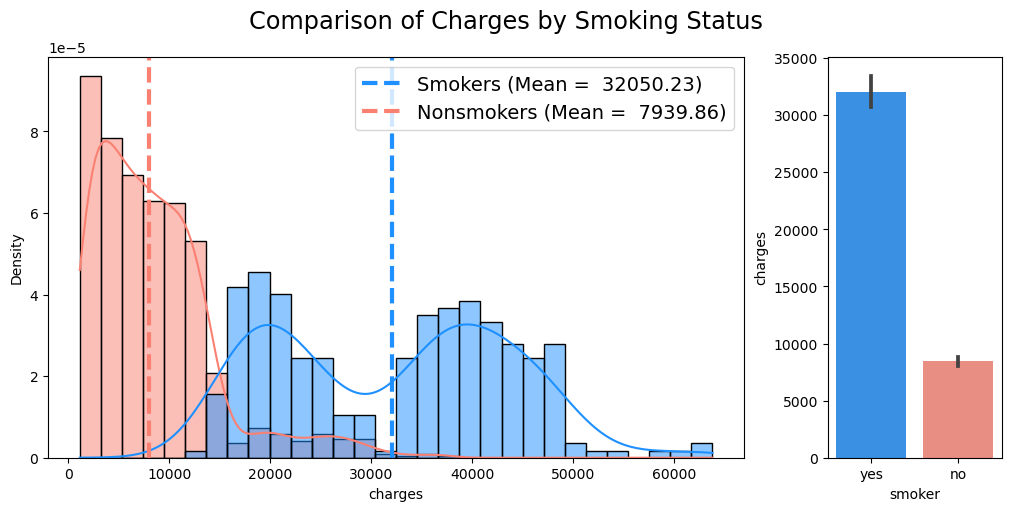

In [30]:
# specify colors
groups_palette={'yes': 'dodgerblue', 
                "no": 'salmon'}

# visualize means
fig, (ax, ax_bar) = plt.subplots(figsize = (10, 5), 
                                 ncols = 2, 
                                 constrained_layout = True,
                                 gridspec_kw = {'width_ratios': [0.8, 0.2]})

# histogram
ax = sns.histplot(data = df, 
                  x = 'charges', 
                  fill = True, 
                  hue = 'smoker', 
                  kde = True, 
                  stat = 'density', 
                  common_norm = False,
                  ax = ax, 
                  palette = groups_palette)

ax.axvline(np.mean(smokers_charges), 
           ls = '--',
           lw = 3, 
           label = f"Smokers (Mean = {np.mean(smokers_charges): .2f})",
           color = groups_palette['yes'])

ax.axvline(np.mean(nonsmokers_charges), 
           ls = '--', 
           lw = 3, 
           label = f"Nonsmokers (Mean = {np.mean(nonsmokers_charges): .2f})",
           color = groups_palette['no'])

ax.legend(prop = {"size": 14}, 
          loc = 'upper right') #bbox_to_anchor=[1,1])

# barplot
sns.barplot(data = df, 
            x = 'smoker', 
            y = 'charges',
            ax = ax_bar,
            palette = groups_palette)

fig.suptitle('Comparison of Charges by Smoking Status',
             fontsize = 'xx-large');

# 3. Are men more likely to smoke than women?

## 3.1 Hypotheses

Null:

Alternative:

## 3.2 Select Test

Data:

Samples/groups:

Test:

## 3.3 Test Assumptions

## 3.4 Execute Test

## 3.5 p-value Interpretation

## 3.6 Supporting Visualization

# 4. Do different regions have different charges, on average?

## 4.1 Hypotheses

Null:

Alternative:

## 4.2 Select Test

Data:

Samples/groups:

Test:

## 4.3 Test Assumptions

## 4.4 Execute Test

## 4.5 p-value Interpretation

## 4.6 Supporting Visualization